In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [108]:
df = pd.read_csv("states_all.csv")
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


In [109]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

df = pd.read_csv('states_cleared_all')

for col in fill_list:
    df[col] = df.groupby('STATE')[col].transform(lambda x: x.interpolate())

In [111]:
for x in df.iloc[:,4:15]:
    df["winsorize_"+x] = winsorize(df[x],(0, 0.10))
df.head(5)

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,winsorize_TOTAL_REVENUE,winsorize_FEDERAL_REVENUE,winsorize_STATE_REVENUE,winsorize_LOCAL_REVENUE,winsorize_TOTAL_EXPENDITURE,winsorize_INSTRUCTION_EXPENDITURE,winsorize_SUPPORT_SERVICES_EXPENDITURE,winsorize_OTHER_EXPENDITURE,winsorize_CAPITAL_OUTLAY_EXPENDITURE,winsorize_GRADES_PK_G
0,0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,...,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,893364.0,174053.0,8224.0
1,1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,...,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,893364.0,37451.0,2371.0
2,2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,...,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,893364.0,609114.0,2544.0
3,3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,...,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,893364.0,145212.0,808.0
4,4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,...,16208970.0,1400984.0,7488570.0,7641041.0,16201905.0,8464947.0,4889221.0,893364.0,1546152.0,33821.0


In [112]:
df.ENROLL.fillna(df.ENROLL.mean(),inplace=True)
df.OTHER_EXPENDITURE.fillna(df.OTHER_EXPENDITURE.mean(),inplace=True)
df.GRADES_1_8_G.fillna(df.GRADES_1_8_G.mean(),inplace=True)
df.GRADES_9_12_G.fillna(df.GRADES_9_12_G.mean(),inplace=True)

In [113]:
df.count()

Unnamed: 0                                1918
PRIMARY_KEY                               1918
STATE                                     1918
YEAR                                      1918
ENROLL                                    1918
TOTAL_REVENUE                             1918
FEDERAL_REVENUE                           1918
STATE_REVENUE                             1918
LOCAL_REVENUE                             1918
TOTAL_EXPENDITURE                         1918
INSTRUCTION_EXPENDITURE                   1918
SUPPORT_SERVICES_EXPENDITURE              1918
OTHER_EXPENDITURE                         1918
CAPITAL_OUTLAY_EXPENDITURE                1918
GRADES_PK_G                               1918
GRADES_KG_G                               1918
GRADES_4_G                                1918
GRADES_8_G                                1918
GRADES_12_G                               1918
GRADES_1_8_G                              1918
GRADES_9_12_G                             1918
GRADES_ALL_G 

In [114]:
df.describe()

,Unnamed: 0,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,winsorize_TOTAL_REVENUE,winsorize_FEDERAL_REVENUE,winsorize_STATE_REVENUE,winsorize_LOCAL_REVENUE,winsorize_TOTAL_EXPENDITURE,winsorize_INSTRUCTION_EXPENDITURE,winsorize_SUPPORT_SERVICES_EXPENDITURE,winsorize_OTHER_EXPENDITURE,winsorize_CAPITAL_OUTLAY_EXPENDITURE,winsorize_GRADES_PK_G
count,1918.000000,1918.000000,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,...,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1.918000e+03,1918.000000,1.918000e+03,1918.000000
mean,958.500000,2001.947341,8.959293e+05,8.953872e+06,7.408167e+05,4.158119e+06,4.054936e+06,9.035729e+06,4.693692e+06,2.638012e+06,...,7.447845e+06,6.038509e+05,3.511611e+06,3.348592e+06,7.473139e+06,3.889446e+06,2.216647e+06,383344.987957,6.960792e+05,13509.504884
std,553.823227,9.061480,8.570686e+05,9.760028e+06,9.539683e+05,4.599935e+06,4.550495e+06,9.944583e+06,5.224740e+06,2.789293e+06,...,4.803821e+06,4.124249e+05,2.192123e+06,2.381962e+06,4.791582e+06,2.507810e+06,1.441323e+06,254873.718844,4.536132e+05,11316.444288
min,0.000000,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,...,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,11541.000000,1.270800e+04,96.000000
25%,479.250000,1994.000000,4.725940e+05,3.182252e+06,2.614470e+05,1.686085e+06,1.241020e+06,3.192700e+06,1.662582e+06,9.543405e+05,...,3.182252e+06,2.614470e+05,1.686085e+06,1.241020e+06,3.192700e+06,1.662582e+06,9.543405e+05,167613.000000,3.188615e+05,2933.250000
50%,958.500000,2002.000000,8.546973e+05,6.680121e+06,5.070045e+05,3.159583e+06,2.936523e+06,6.734906e+06,3.491283e+06,1.988172e+06,...,6.680121e+06,5.070045e+05,3.159583e+06,2.936523e+06,6.734906e+06,3.491283e+06,1.988172e+06,354062.500000,6.436868e+05,10664.500000
75%,1437.750000,2010.000000,9.463963e+05,1.141923e+07,9.104578e+05,5.220582e+06,5.170978e+06,1.134991e+07,5.899448e+06,3.399402e+06,...,1.141923e+07,9.104578e+05,5.220582e+06,5.170978e+06,1.134991e+07,5.899448e+06,3.399402e+06,531916.490196,1.022395e+06,23270.500000
max,1917.000000,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,...,1.620897e+07,1.400984e+06,7.488570e+06,7.912707e+06,1.620190e+07,8.464947e+06,4.889221e+06,893364.000000,1.546152e+06,33821.000000


In [115]:
df.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,winsorize_TOTAL_REVENUE,winsorize_FEDERAL_REVENUE,winsorize_STATE_REVENUE,winsorize_LOCAL_REVENUE,winsorize_TOTAL_EXPENDITURE,winsorize_INSTRUCTION_EXPENDITURE,winsorize_SUPPORT_SERVICES_EXPENDITURE,winsorize_OTHER_EXPENDITURE,winsorize_CAPITAL_OUTLAY_EXPENDITURE,winsorize_GRADES_PK_G
0,0,1992_ALABAMA,ALABAMA,1992,895929.306678,2678885.0,304177.0,1659028.0,715680.0,2653798.0,...,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,893364.0,174053.0,8224.0
1,1,1992_ALASKA,ALASKA,1992,895929.306678,1049591.0,106780.0,720711.0,222100.0,972488.0,...,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,893364.0,37451.0,2371.0
2,2,1992_ARIZONA,ARIZONA,1992,895929.306678,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,...,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,893364.0,609114.0,2544.0
3,3,1992_ARKANSAS,ARKANSAS,1992,895929.306678,1711959.0,178571.0,958785.0,574603.0,1743022.0,...,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,893364.0,145212.0,808.0
4,4,1992_CALIFORNIA,CALIFORNIA,1992,895929.306678,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,...,16208970.0,1400984.0,7488570.0,7641041.0,16201905.0,8464947.0,4889221.0,893364.0,1546152.0,33821.0


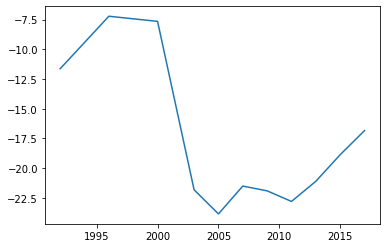

In [155]:
year_cal= df[df["STATE"]=="CALIFORNIA"]["YEAR"]

exp_cal = df[df["STATE"]=="CALIFORNIA"]["TOTAL_EXPENDITURE"]

y = df[df.STATE == "CALIFORNIA"][['YEAR', 'FARK_4']].dropna().FARK_4

x = df[df.STATE == "CALIFORNIA"][['YEAR', 'FARK_4']].dropna().YEAR

plt.plot(x,y)

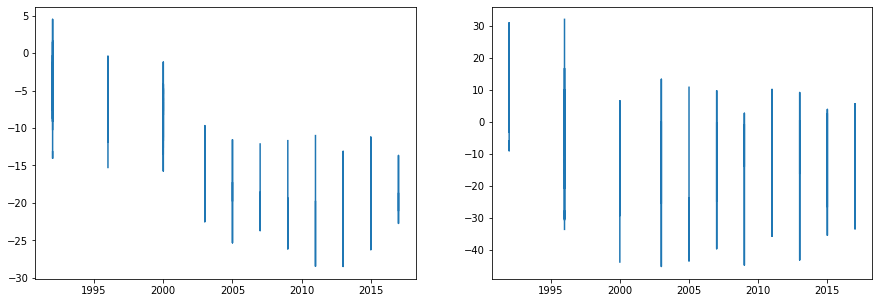

In [147]:
df["FARK_4"] = df.AVG_READING_4_SCORE - df.AVG_MATH_4_SCORE
df["FARK_8"] = df.AVG_READING_8_SCORE - df.AVG_MATH_8_SCORE

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(df["YEAR"],df["FARK_4"])
plt.subplot(1,2,2)
plt.plot(df["YEAR"],df["FARK_8"])
plt.show()

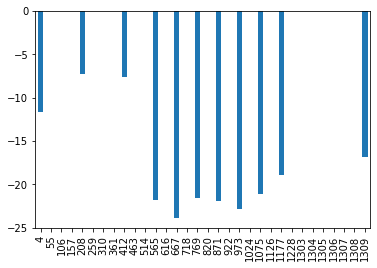

In [148]:
df[df.STATE == "CALIFORNIA"].FARK_4.plot.bar()

Text(0.5, 1.0, 'reading ve math farkı  (8)')

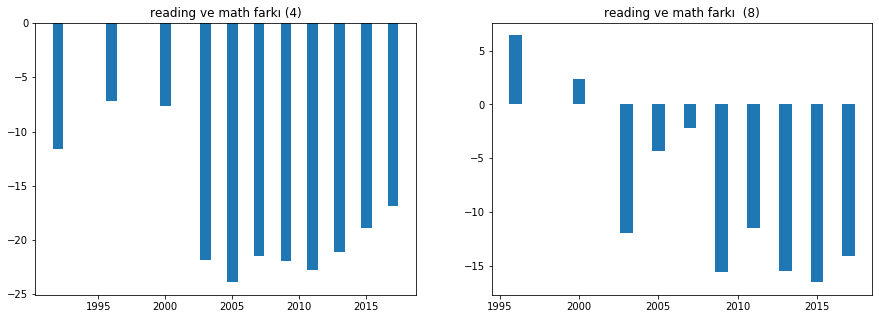

In [157]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(x,y)

plt.title("reading ve math farkı (4)")

plt.subplot(1,2,2)
plt.bar(df.loc[df.STATE == "CALIFORNIA", "YEAR"],
         df.loc[df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - df.loc[df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("reading ve math farkı  (8)")

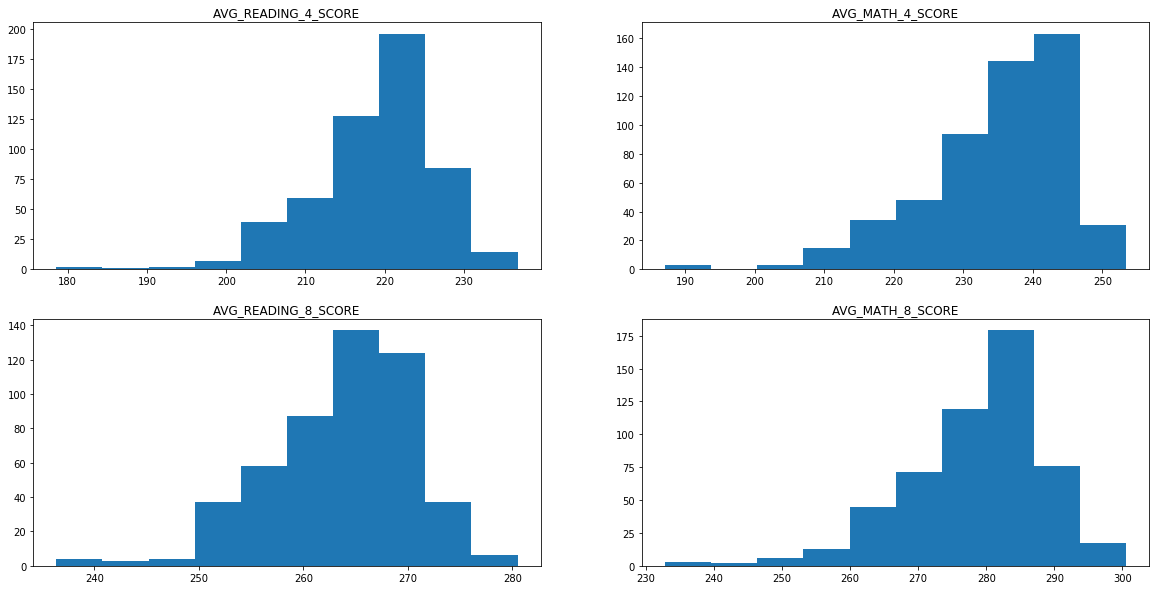

In [158]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df.AVG_READING_4_SCORE.dropna())
plt.title("{}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(df.AVG_MATH_4_SCORE.dropna())
plt.title("{}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(df.AVG_READING_8_SCORE.dropna())
plt.title("{}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(df.AVG_MATH_8_SCORE.dropna())
plt.title("{}".format("AVG_MATH_8_SCORE"))
plt.show()

In [161]:
df = pd.read_csv('states_all.csv')
states = df["STATE"].unique()

In [162]:
orjinal_MATH_4 = df.AVG_MATH_4_SCORE.dropna()
interpolate_MATH_4 = df.AVG_MATH_4_SCORE.interpolate()
median_MATH_4 = df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.median())
mean_MATH_4 = df.AVG_MATH_4_SCORE.fillna(df.AVG_MATH_4_SCORE.mean())

In [165]:
orjinal_READING_4 = df.AVG_READING_4_SCORE.dropna()
interpolate_READING_4 = df.AVG_READING_4_SCORE.interpolate()
median_READING_4 = df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.median())
mean_READING_4 = df.AVG_READING_4_SCORE.fillna(df.AVG_READING_4_SCORE.mean())

In [166]:
orjinal_MATH_8 = df.AVG_MATH_8_SCORE.dropna()
interpolate_MATH_8 = df.AVG_MATH_8_SCORE.interpolate()
median_MATH_8 = df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.median())
mean_MATH_8 = df.AVG_MATH_8_SCORE.fillna(df.AVG_MATH_8_SCORE.mean())

In [167]:
orjinal_READING_8 = df.AVG_READING_8_SCORE.dropna()
interpolate_READING_8 = df.AVG_READING_8_SCORE.interpolate()
median_READING_8 = df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.median())
mean_READING_8 = df.AVG_READING_8_SCORE.fillna(df.AVG_READING_8_SCORE.mean())

C:\Users\enes_\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\enes_\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


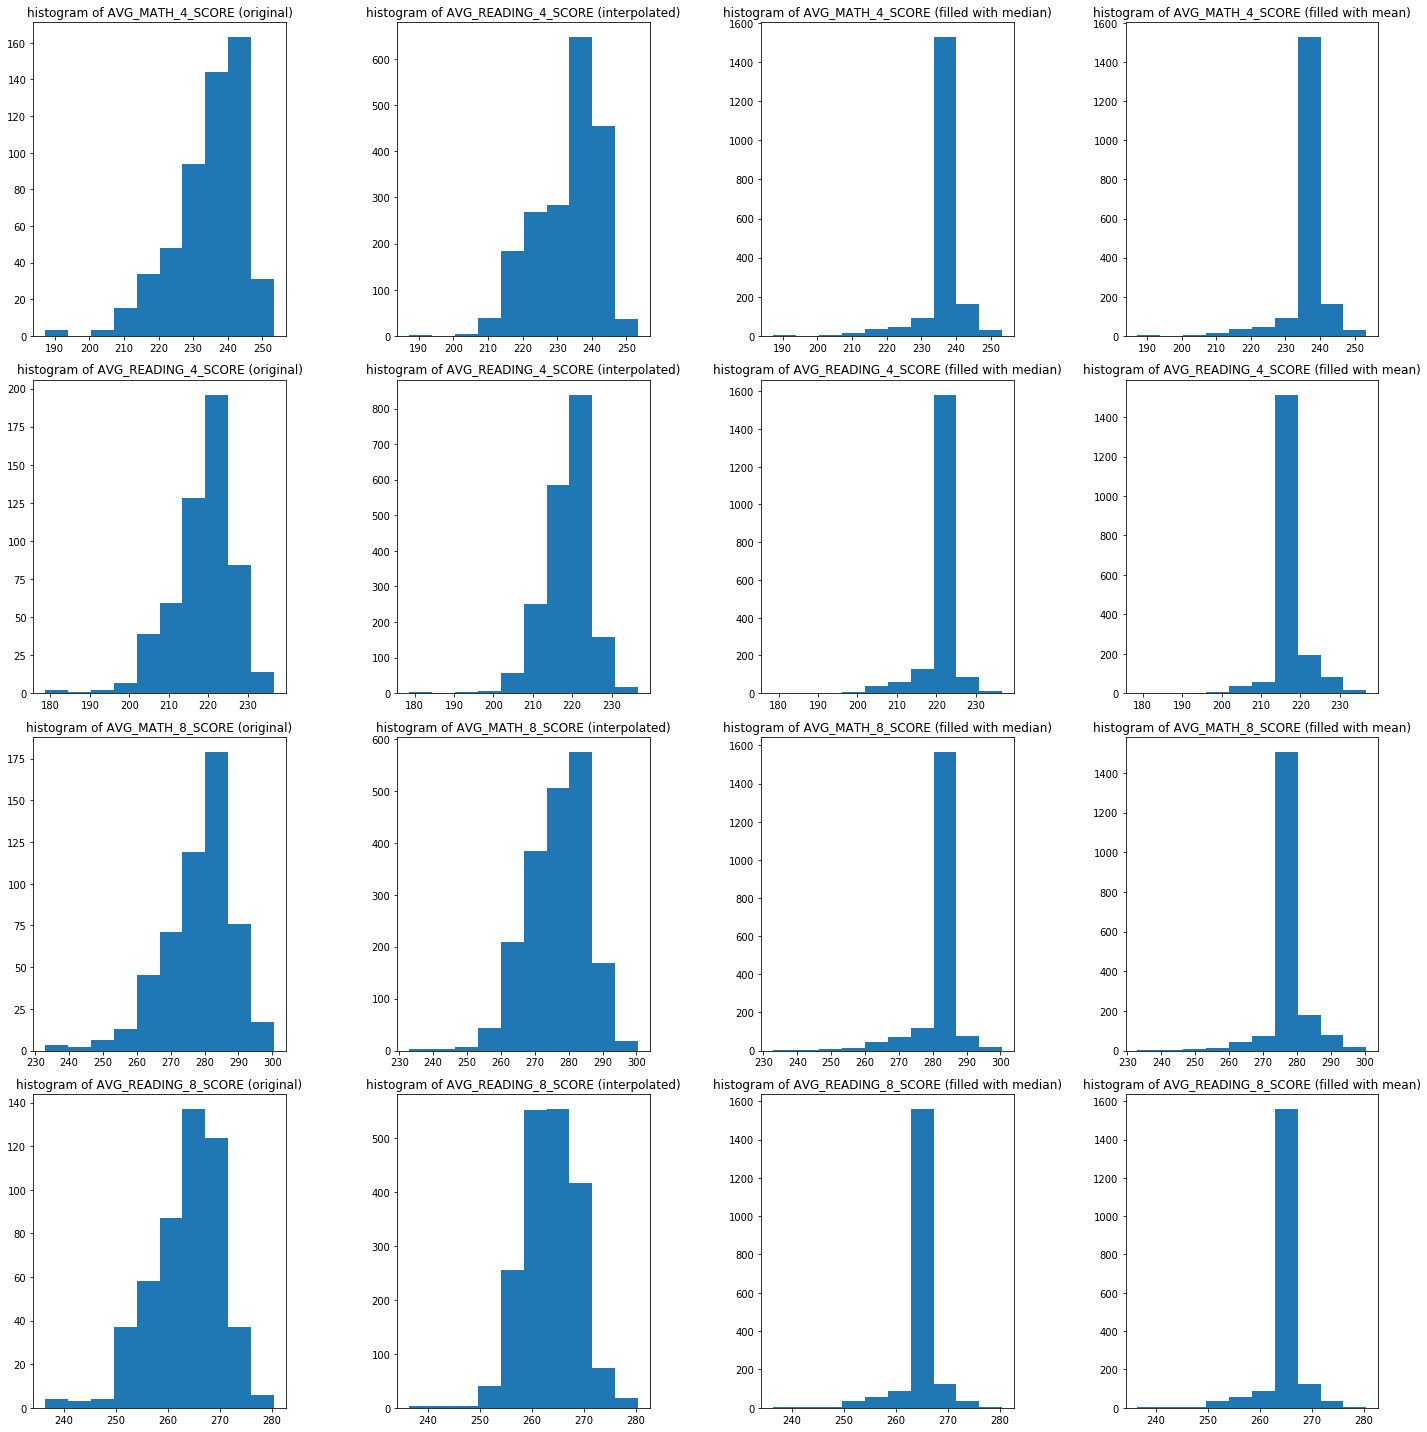

In [168]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(orjinal_MATH_4)
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(interpolate_MATH_4)
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(median_MATH_4)
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(mean_MATH_4)
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,5)
plt.hist(orjinal_READING_4)
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(interpolate_READING_4)
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(median_READING_4)
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(mean_READING_4)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(orjinal_MATH_8)
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(interpolate_MATH_8)
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(median_MATH_8)
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(mean_MATH_8)
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,13)
plt.hist(orjinal_READING_8)
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(interpolate_READING_8)
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(median_READING_8)
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(mean_READING_8)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()